## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage
#This code imports several libraries such as NumPy, Matplotlib, PIL, and
#PyTorch, as well as specific functions and modules for image processing and
#visualization. It also imports predefined datasets from torchvision.

In [ ]:
!pip install wandb
import wandb as wb
#This code installs the Weights & Biases (wandb) library using pip, and then
#imports it with the alias 'wb' for use in the code.
#Weights & Biases is commonly used for experiment tracking, visualization, and
#collaboration in machine learning projects.

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
#This function `plot(x)` takes an input `x`, which could be either a PyTorch
#tensor or a NumPy array. If `x` is a PyTorch tensor, it converts it to a NumPy
#array first. Then, it plots the array as an image using Matplotlib with a
#grayscale colormap, hides the axis, sets the figure size to 5x5 inches, and displays the plot.

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))
#This function `montage_plot(x)` pads the input array `x` with zeros along its
#second and third dimensions, then creates a montage (tiled) visualization of the resulting array using the `montage` function.
#Finally, it plots the montage using the `plot` function.

In [ ]:
b = 1000
#This sets the batch size to 1000. A batch is a subset of your dataset that is used in one iteration of model training.
def get_batch(mode):
#The function get_batch(mode) is used to generate a batch of data for training or testing a machine learning model.
#The mode parameter determines whether the function should return a batch from the training set (X, Y) or the test set (X_test, Y_test).
    if mode == "train":
#If mode is "train", the function generates a random index r between 0 and the number of training examples minus the batch size. It then returns a batch of input data x and corresponding labels y from the training set, starting from index r and of size b.
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
#If mode is "test", the function does the same but with the test set.
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
#This function is typically used in the training loop of a machine learning
#model, where it’s important to use different batches of data in each iteration
#to ensure that the model generalizes well to unseen data. The randomness in
#selecting batches helps introduce variability in the training process, which can help prevent overfitting.


## MNIST
    

### Load Data

In [ ]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
#This line is downloading the MNIST training set and saving it in a directory named ‘data’. If the dataset is already downloaded, it will not be downloaded again due to download=True.
test_set  = MNIST('./data', train=False, download=True)
#This line is doing the same but for the MNIST test set. The train=False argument specifies that we want to download the test set.

#After these lines of code are executed, train_set and test_set will be dataset objects that you can use to create data loaders for training and testing a model.


#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
#This line converts the image data from the training set into a NumPy array and assigns it to X.
X_test = test_set.data.numpy()
#This line does the same for the image data from the test set and assigns it to X_test.
Y = train_set.targets.numpy()
#This line converts the labels (targets) from the training set into a NumPy array and assigns it to Y.
Y_test = test_set.targets.numpy()
# This line does the same for the labels from the test set and assigns it to Y_test.
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
#These lines normalize the image data in X and X_test.
#The [:,None,:,:] part is used to add an extra dimension to the data, which is often required by machine learning libraries.
#The division by 255 scales the pixel values (which are originally between 0 and 255) to be between 0 and 1

In [ ]:
X.shape #gives a tuple for dimensions in terms of number of images, of color channels, height and width

(60000, 1, 28, 28)

In [ ]:
Y[50000] #indexing into the Y array to retrieve the label of the 50,001st image in the training set.

3

In [ ]:
plot(X[50000,0,:,:]) #used to display the 50,001st image in grayscale

In [ ]:
Y[100] #indexing 101st element

5

In [ ]:
X.shape #gives dimensions

(60000, 1, 28, 28)

In [ ]:
X[0:25,0,:,:].shape #gives dimensions

(25, 28, 28)

In [ ]:
montage_plot(X[125:150,0,:,:]) #display a montage plot of images 126 to 150 in the training set.

In [ ]:
X.shape[0] #gives 1st element in the dimensions

60000

In [ ]:
X_test.shape #gives dimensions

(10000, 1, 28, 28)

In [ ]:
X.shape[0] #gives 1st element of dimensions

60000

In [ ]:
X_test.shape[0] #gives 1st element of dimensions which is number of images

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
#The `GPU(data)` function converts the input data into a PyTorch tensor with
#gradients enabled, of type float, and moves it to the GPU.
#The `GPU_data(data)` function does the same but with gradients disabled.

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)
#These lines of code convert the datasets `X`, `Y`, `X_test`, and `Y_test` into
# PyTorch tensors of type float on the GPU, with gradients disabled.

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
#These lines of code reshape the `X` and `X_test` tensors to have 784 columns, keeping the number of rows the same.
#This is typically done when flattening images for a machine learning model.

In [ ]:
X.shape #gives dimensions of tensor as numbers of rows and columns

torch.Size([60000, 784])


### Classifier


In [ ]:
x,y = get_batch('train')
#The line `x,y = get_batch('train')` fetches a batch of training data and labels, assigning them to `x` and `y` respectively.

In [ ]:
x.shape #gies dimensions of tensor

torch.Size([1000, 784])

In [ ]:
plot(x[0].reshape(28,28)) #The line `plot(x[0].reshape(28,28))` visualizes the first instance of the batch `x` reshaped to a 28x28 grid, typically used to display an image in a machine learning context.

In [ ]:
plot(x[1].reshape(28,28)) #The line `plot(x[1].reshape(28,28))` visualizes the second instance of the batch `x` reshaped to a 28x28 grid, typically used to display an image in a machine learning context.

In [ ]:
plot(x[2].reshape(28,28)) #The line `plot(x[2].reshape(28,28))` visualizes the third instance of the batch `x` reshaped to a 28x28 grid, typically used to display an image in a machine learning context.

In [ ]:
y[:10] #The command `y[:10]` retrieves the first 10 elements from the tensor `y`, typically representing the labels or targets for the first 10 instances in a machine learning context.

tensor([4., 7., 1., 5., 1., 9., 2., 6., 0., 9.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10)) #The line `W = GPU(np.random.randn(784,10))` creates a 784x10 matrix of random numbers using the numpy function `np.random.randn`, converts it into a PyTorch tensor with gradients enabled, of type float, and moves it to the GPU.
# This is typically done to initialize the weights of a machine learning model.

In [ ]:
x.shape, W.shape #gives tensor dimensions

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape #The command `torch.matmul(x,W).shape` returns the shape of the result of the matrix multiplication of `x` and `W` using PyTorch's `matmul` function.
#This is typically used to verify the dimensions of the output in a machine learning context.

torch.Size([1000, 10])

In [ ]:
(x@W).shape #The expression (x@W).shape is used in Python, particularly with NumPy or PyTorch libraries, for matrix operations and shape manipulations.

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W
#The `%%timeit x@W` command in Python measures and outputs the average time it takes to perform the matrix multiplication `x@W` over multiple runs.
# It's a magic command in IPython environments used for timing code execution.

20.7 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W #This is a matrix multiplication operation. The @ operator is used to perform matrix multiplication between x and W. x and W are assumed to be matrices (or tensors) that are compatible for multiplication. That is, the number of columns in x should be equal to the number of rows in W.

In [ ]:
y2 = x@W #defining the variable

In [ ]:
plot(y2[:50]) #plots the first 50 elements of y2.

In [ ]:
y #displays

In [ ]:
y.shape #gives tensor dimensions

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2
#The function `one_hot(y)` converts a batch of class labels `y` into a one-hot
#encoded tensor using GPU, where each label is represented as a 10-dimensional
#vector with a single '1' at the index of the class and '0's elsewhere.

In [ ]:
one_hot(y) #The `one_hot(y)` function call applies the `one_hot` function to the input `y`, converting the class labels in `y` into a one-hot encoded format.

<ipython-input-38-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1) #The `torch.argmax(y2,1)` function call in PyTorch returns the indices of the maximum values along dimension 1 (columns) of the tensor `y2`.

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b #The expression `torch.sum(y == torch.argmax(y2,1))/b` calculates the accuracy of predictions `y2` against true labels `y` in a batch of size `b`. It does this by comparing the predicted class (the index with the maximum value in `y2`) with the true class `y`, summing up the correct predictions, and then dividing by the batch size `b`.
#This gives the proportion of correct predictions in the batch.

tensor(0.0890, device='cuda:0')

In [ ]:
X.shape #gives tensor dimensions

torch.Size([60000, 784])

In [ ]:
X@W #matrix multiplication operation between compatible tensors

tensor([[  2.4150,  -9.3041,   2.2678,  ...,   2.2788,  -3.3525,  -2.1586],
        [ -5.2223,   1.7370,  -0.4901,  ...,  22.6241,   0.6255, -17.3633],
        [ 11.7900,   8.1169,   3.4437,  ...,   4.9776,   4.0090,  14.6905],
        ...,
        [  1.5532,   8.2267,  -9.3373,  ...,  -6.3725, -11.2003,   0.9299],
        [  2.4485,   4.3288, -17.8427,  ...,   9.1859,   4.0388,  -9.0019],
        [ -0.3791,   0.2381,  -0.8737,  ...,  14.9609,   4.8975, -10.4056]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1) #The `torch.argmax(X@W,1)` function call in PyTorch performs matrix multiplication of `X` and `W`, and then returns the indices of the maximum values along dimension 1 (columns) of the resulting tensor.
#This is often used to get the predicted class labels in a classification task.

tensor([3, 7, 9,  ..., 5, 5, 7], device='cuda:0')

In [ ]:
Y #displays

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000 #This line calculates the accuracy of predictions by comparing the indices of maximum values in the tensor resulting from the matrix multiplication of `X` and `W` with the labels `Y`, and then dividing by the total number of samples (60,000).

tensor(0.0959, device='cuda:0')

In [ ]:
X@W #tensor multiplication

tensor([[  2.4150,  -9.3041,   2.2678,  ...,   2.2788,  -3.3525,  -2.1586],
        [ -5.2223,   1.7370,  -0.4901,  ...,  22.6241,   0.6255, -17.3633],
        [ 11.7900,   8.1169,   3.4437,  ...,   4.9776,   4.0090,  14.6905],
        ...,
        [  1.5532,   8.2267,  -9.3373,  ...,  -6.3725, -11.2003,   0.9299],
        [  2.4485,   4.3288, -17.8427,  ...,   9.1859,   4.0388,  -9.0019],
        [ -0.3791,   0.2381,  -0.8737,  ...,  14.9609,   4.8975, -10.4056]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape #gives tensor dimensions

torch.Size([784, 10])

In [ ]:
W[:,0].shape #gives tensor dimensions

torch.Size([784])

In [ ]:
plot(W[:,0].reshape(28,28)) #This line plots the first column of tensor `W` after reshaping it into a 28x28 image.

In [ ]:
plot(W[:,2].reshape(28,28)) #This line plots the third column of tensor `W` after reshaping it into a 28x28 image.

In [ ]:
W.shape #gives ternsor dimensions

torch.Size([784, 10])

In [ ]:
(W.T).shape #This retrieves the shape of the transpose of tensor `W`, swapping its dimensions.

torch.Size([10, 784])

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) #This line generates a montage plot of the transpose of tensor `W` after reshaping it into a 10x28x28 array, converting it to a NumPy array, and then plotting it.

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
#This function `softmax(x)` computes the softmax activation function for the
#input tensor `x`. It first subtracts the maximum value of each row from the
#corresponding elements in `x` to prevent overflow, then exponentiates the result.
#Afterward, it normalizes each row by dividing by the sum of exponentiated values along each row.
#Finally, it returns the resulting tensor.

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

#This function `cross_entropy(outputs, labels)` computes the cross-entropy loss
#given the predicted outputs and the true labels.
#It first applies the softmax activation function to the outputs, then
#calculates the negative log probabilities corresponding to the predicted class labels.
#Finally, it returns the average cross-entropy loss across all samples.

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

#This function `acc(out, y)` computes the accuracy of predictions given the
#predicted outputs `out` and the true labels `y`. It compares the indices of
#maximum values in the predicted outputs with the true labels, sums the correct
#predictions, converts the result to a Python scalar, and finally divides by the
#total number of samples `y.shape[0]` to obtain the accuracy.

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
#This function `get_batch(mode)` retrieves a batch of data based on the
#specified mode ("train" or "test"). If the mode is "train", it randomly selects
#a batch of size `b` from the training data `X` and its corresponding labels `Y`
#If the mode is "test", it randomly selects a batch of size `b` from the test
#data `X_test` and its corresponding labels `Y_test`.
#Finally, it returns the batch of input data `x` and its corresponding labels `y`.

In [ ]:
def model(x,w):

    return x@w[0]
#This function `model(x, w)` defines a simple linear model that performs matrix
#multiplication between the input tensor `x` and the first element of tensor `w`.

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()
#This function `gradient_step(w)` updates the weights `w` using gradient descent.
#It subtracts the product of the learning rate `c.L` and the gradient of the weights from the weights themselves to perform the update.
#Then, it zeros out the gradient to prepare for the next iteration.

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

#This function `make_plots()` generates plots and logs the training and testing accuracies using Weights & Biases.
#It first computes the training accuracy by passing the training data `x` and its corresponding labels `y` through the model `model(x, w)` and calculating the accuracy using the `acc` function.
#Then, it retrieves a batch of test data `xt` and its corresponding labels `yt` using `get_batch('test')`, and computes the testing accuracy in a similar manner.
#Finally, it logs both training and testing accuracies using Weights & Biases.

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

#This function `Truncated_Normal(size)` generates samples from a truncated normal distribution with mean 0 and standard deviation 1.
#It first generates uniform random samples `u1` and `u2`, then applies a transformation to obtain samples from a standard normal distribution.
#Finally, it scales and shifts these samples to match the desired mean and standard deviation, resulting in truncated normal samples.

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-38-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


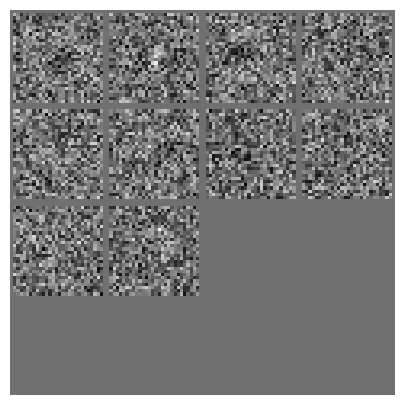

acc_test,▁▁▂▃▂▃▅▄▅▅▄▅▆▆▆▆▆▆▇▇▇▇▇▇█▇▇▇██▇██▇█▇█▇██
acc_train,▁▁▂▂▃▃▃▄▅▅▅▅▅▆▇▆▇▇▆▇▇▇▇█▇▇██▇█▇███████▇█
acc_test,0.62695
acc_train,0.58984


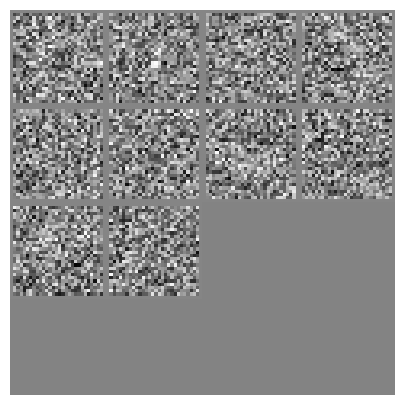

acc_test,▁▂▂▃▄▆▅▅▅▇▆▆▆▇▇▇▆█▇▇▇▇███████▇███▇█▇████
acc_train,▁▁▂▃▄▄▅▅▆▆▆▆▇▆▆▇▇▆▇▇▇▇██▇▇▇██▇▇▇█▇▇▇▇███
acc_test,0.44336
acc_train,0.4873


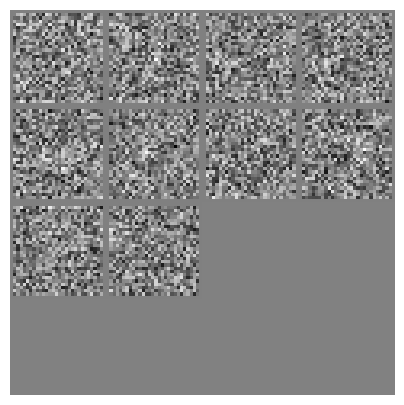

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
#Initializes Weights & Biases for experiment tracking, specifying the project name.
    c = wb.config
#Sets up a configuration object to store experiment parameters.
    c.L = 0.1
    c.b = 1024
    c.epochs = 10000
#c.L = 0.1: Sets the learning rate to 0.1.
#c.b = 1024: Sets the batch size to 1024.
    w = [GPU(Truncated_Normal((784,10)))]
#Initializes the weight parameter w as a list containing a tensor obtained from a truncated normal distribution of shape (784, 10). The GPU() function likely places this tensor on the GPU.
    for i in range(c.epochs): #Iterates over c.epochs epochs.

        x,y = get_batch('train')
#Obtains a batch of training data and labels.
        out = model(x,w)
#Computes the output of the model for the given batch of data.
        loss = cross_entropy(softmax(out),y)
# Computes the cross-entropy loss between the model predictions and the true labels.
        loss.backward()
# Backpropagates the gradients through the computational graph.
        gradient_step(w)
#Updates the weights using gradient descent.
        make_plots()
# Generates and logs training and testing accuracies using Weights & Biases.
        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
#Every 10,000 iterations, plots a montage of the transposed weights reshaped into 10 images of size 28x28 each.

In [ ]:
for run in range(100): #Iterates over 100 runs.

    wb.init(project="Simple_Linear_Adam_2"); # Initializes Weights & Biases for experiment tracking, specifying the project name.
    c = wb.config #Sets up a configuration object to store experiment parameters.

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000
#c.L = 0.01: Sets the learning rate to 0.01.
#c.b = 1024: Sets the batch size to 1024.
#c.epochs = 100000: Sets the number of epochs to 100,000.
    w = [GPU(Truncated_Normal((784,10)))]
#Initializes the weight parameter w as a list containing a tensor obtained from a truncated normal distribution of shape (784, 10). The GPU() function likely places this tensor on the GPU.
    optimizer = torch.optim.Adam(w, lr=c.L)
#Initializes the Adam optimizer with the specified learning rate.
    for i in range(c.epochs): #Iterates over c.epochs epochs.

        x,y = get_batch('train')
#Obtains a batch of training data and labels.
        loss = cross_entropy(softmax(model(x,w)),y)
#Computes the cross-entropy loss between the model predictions and the true labels.
        optimizer.zero_grad()
#Clears the gradients of all optimized tensors.
        loss.backward()
#: Backpropagates the gradients through the computational graph.
        optimizer.step()
#Performs a single optimization step (parameter update).
        wb.log({"loss": loss})
#Logs the loss using Weights & Biases.
        make_plots()
#Generates and logs training and testing accuracies using Weights & Biases.
        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())
#Every 10,000 iterations, plots a montage of the transposed weights reshaped into 10 images of size 28x28 each.


### Autoencoder


In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
#This function `get_batch(mode)` retrieves a batch of data based on the specified mode ("train" or "test").
#It randomly selects a batch of size 1024 from either the training data `X` or the test data `X_test`, along with their corresponding labels `Y` or `Y_test`, respectively, and returns them.

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)
#This code reshapes the training and test data arrays `X` and `X_test` into
#4D tensors with dimensions representing batch size, number of channels, height, and width, where each image is now represented as a single-channel (grayscale) image with dimensions 28x28.

In [ ]:
import torchvision
from torch.nn.functional import *
#These lines import the torchvision package, which provides popular datasets,
#model architectures, and image transformations for computer vision tasks.
#Additionally, it imports the functional module from the PyTorch neural network package (`torch.nn.functional`), which contains a variety of functions commonly used in neural network operations such as activation functions, loss functions, and convolutional operations.

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)
#This code normalizes the pixel values of the training and test data arrays `X`
#and `X_test`, shifting and scaling them so that they have a mean of 0.5 and a standard deviation of 0.5.

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x
#This function `Encoder(x, w)` performs encoding operations on the input tensor
#`x` using convolutional and linear layers specified by the weights `w`.
#It applies two convolutional layers with ReLU activation functions, followed by reshaping the output into a 1D tensor and applying a linear transformation.

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x
#This function `Decoder(x, w)` performs decoding operations on the input tensor
#`x` using linear and transposed convolutional layers specified by the weights `w`.
#It applies a linear transformation followed by reshaping the output into a 4D tensor, then applies transposed convolutional layers with ReLU activation function and hyperbolic tangent (tanh) activation function, respectively.

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)
#This function `Autoencoder(x, w)` implements an autoencoder model by first
#encoding the input tensor `x` using the `Encoder` function with weights `w`,
#and then decoding the encoded representation using the `Decoder` function with the same weights `w`.

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3
#This code sets the number of optimization steps to 1000, the batch size to 512, and the learning rate to 0.001.

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage
#This code imports various libraries and modules including NumPy, Matplotlib,
#PyTorch, and torchvision, as well as specific functions and classes for image processing, visualization, and machine learning tasks.

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
#This function `randn_trunc(s)` generates samples from a truncated normal distribution with mean 0 and standard deviation 0.1.
#It uses the `truncnorm` function from the scipy.stats module to create a truncated normal distribution object `R` with the specified bounds and parameters, and then generates `s` random samples from this distribution.

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]
#w0, w1, w2, w3, w4, and w5 are initialized as weights for the autoencoder model.
#randn_trunc generates samples from a truncated normal distribution for weight initialization.
#These weights are then placed on the GPU using GPU() function, likely to utilize GPU acceleration during training.

optimizer = torch.optim.Adam(params=w, lr=learning_rate)
#optimizer is initialized using the Adam optimizer with the parameters w (containing all the weights) and the specified learning rate learning_rate.

for i in range(num_steps): #Iterates through a specified number of optimization steps

    x_real,y = get_batch('train')
#Obtains a batch of real data x_real and their corresponding labels y
    x_fake = Autoencoder(x_real,w)
#Generates fake data x_fake by passing x_real through the autoencoder model
    loss = torch.mean((x_fake - x_real)**2)
#Computes the mean squared error loss between the fake and real data.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#Performs backpropagation by calling loss.backward() and optimization step by calling optimizer.step() to update the weights.

    if i % 100 == 0: print(loss.item())
#Optionally prints the loss every 100 iterations

In [ ]:
image_batch,y = get_batch('test') #This line retrieves a batch of test images (`image_batch`) and their corresponding labels (`y`) from the test dataset.

In [ ]:
image_batch_recon = Autoencoder(image_batch,w) #This line generates reconstructed images (`image_batch_recon`) using the autoencoder model (`Autoencoder`) applied to the input batch of images (`image_batch`) with the specified weights (`w`).

In [ ]:
torch.mean((image_batch_recon - image_batch)**2) #This computes the mean squared error between the reconstructed images (`image_batch_recon`) and the original input images (`image_batch`).

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy()) #This line generates and displays a montage plot of the first 25 images from a batch of images (`image_batch`) after selecting the first channel and converting them to NumPy arrays.

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy()) #This line generates and displays a montage plot of the first 25 reconstructed images from a batch of images (`image_batch_recon`) after selecting the first channel and converting them to NumPy arrays.


### Generator



In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024
#initializes values
#This code defines constants for the latent size, hidden size, and image size, as well as the batch size.

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)
#it loads the Fashion MNIST dataset for both training and testing from the specified directory,
# downloading the dataset if it's not already available locally.

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5
#This code preprocesses the Fashion MNIST dataset by converting the data and
#labels to NumPy arrays, reshaping the data to have a single channel, scaling
#pixel values to a range between -1 and 1, and finally standardizing the pixel
#values to have a mean of 0 and a standard deviation of 1.

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]
#This code filters the training and test data (`X` and `X_test`, respectively)
#to include only the samples corresponding to the class labeled `n` in the target labels (`Y` and `Y_test`, respectively).

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape #This code retrieves and displays the shapes of the training data (`X`), training labels (`Y`), test data (`X_test`), and test labels (`Y_test`).

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)
#This code moves the training and test data (`X` and `X_test`), as well as their
#corresponding labels (`Y` and `Y_test`), to the GPU for processing, likely using a function called `GPU_data()`.

In [ ]:
x,y = get_batch('train') #This line obtains a batch of training data (`x`) and their corresponding labels (`y`) from the training dataset using the function `get_batch('train')`.

In [ ]:
x.shape #This line retrieves the shape of the tensor `x`, indicating its dimensions.

torch.Size([1024, 1, 28, 28])

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())
#This line generates and displays a montage plot of the first 25 images from a
#batch of images `x`, after selecting the first channel and converting them to NumPy arrays.

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]
#This code initializes weights for a generator (G) and a discriminator (D) in a generative adversarial network (GAN) setup.
#The weights for the discriminator are initialized to be used in the first few layers of the neural network architecture,
#while the weights for the generator are initialized for the latter layers.

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x
#This function `D(x, w)` defines the forward pass of a discriminator neural network.
#It applies two convolutional layers with ReLU activation functions, flattens the
#output into a 1D tensor, applies a linear transformation, and finally, passes
#it through a sigmoid activation function to obtain the probability of the input being real.

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x
#This function `G(x, w)` defines the forward pass of a generator neural network.
#It applies a linear transformation followed by reshaping the output into a 4D
#tensor, then applies transposed convolutional layers with ReLU activation
#function and hyperbolic tangent (tanh) activation function, respectively, to generate synthetic data.

In [ ]:
b = 1024 #initializes costannt

In [ ]:
batch_size = b #sets the variable batch_size to the value of b and then assigns the tuple (b, batch_size) to b, effectively overwriting its original value.

In [ ]:
batch_size #displays

1024

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())
#This code initializes Adam optimizers for the discriminator (`d_optimizer`) and the generator (`g_optimizer`) using separate sets of weights.
#Additionally, it creates tensors for real labels (`real_labels`) and fake
#labels (`fake_labels`) with the appropriate size and values (1 for real labels and 0 for fake labels), both moved to the GPU for computation.

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches
#This code sets the number of epochs to 500, computes the number of batches
#per epoch based on the size of the dataset (`X`) and the batch size, and calculates the total number of optimization steps (`steps`) by multiplying the number of epochs by the number of batches.

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())
#These lines generate two sets of random tensors `z1` and `z2`, each of shape
#`(steps, batch_size, latent_size)`, filled with samples drawn from a standard normal distribution.
# These tensors are then moved to the GPU for computation.

In [ ]:
for i in range(steps): #Iterates through each optimization step.

    images,y = get_batch('train')
# Obtains a batch of real images (images) and their corresponding labels (y) from the training dataset.
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
#Computes the discriminator loss (d_loss) as the sum of binary cross-entropy losses. The first term measures the difference between the discriminator's predictions on real images and the real labels, and the second term measures the difference between the discriminator's predictions on fake images generated by the generator and the fake labels.
    d_optimizer.zero_grad()
#Clears the gradients of all optimized tensors associated with the discriminator optimizer.
    d_loss.backward()
#Backpropagates the gradients of the discriminator loss.
    d_optimizer.step()
#Updates the discriminator's weights (w[0:3]) using the discriminator optimizer.

    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
#Computes the generator loss (g_loss) as the binary cross-entropy loss between the discriminator's predictions on fake images generated by the generator and the real labels.
    g_optimizer.zero_grad()
#Clears the gradients of all optimized tensors associated with the generator optimizer.
    g_loss.backward()
#Backpropagates the gradients of the generator loss.
    g_optimizer.step()
#Updates the generator's weights (w[3:]) using the generator optimizer.

    if i % 200 == 0: #Checks if the current iteration is a multiple of 200.
        out = G(z1[np.random.randint(steps)],w)
#Generates a batch of fake images from a randomly selected latent vector using the generator.
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])
#Reshapes the generated images and plots a montage of the first 25 images.

In [ ]:
z1[np.random.randint(steps)].shape
#This line retrieves a random latent vector (`z1`) from a set of latent vectors generated for each optimization step, then selects one randomly using `np.random.randint(steps)` and returns its shape.

In [ ]:
noise = GPU_data(torch.randn(1,64))
#This line generates a random noise vector of shape `(1, 64)` filled with samples drawn from a standard normal distribution and moves it to the GPU for computation.

In [ ]:
output = G(noise,w)
#This line generates an output tensor by passing a noise vector (`noise`) through the generator neural network (`G`) with the specified weights (`w`).

In [ ]:
output.shape
#This line retrieves the shape of the output tensor `output`, indicating its dimensions.

In [ ]:
plot(output[0,0])
#This line plots the first channel of the output tensor `output`, likely representing an image, using a plotting function named `plot()`.